In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [87]:
import datetime as dt

# Part 1 - Prepare SQLAlchemy 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [ ]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)

# Part 2 - Exploratory Climate Analysis

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
year_precip = pd.read_sql('SELECT date, prcp FROM measurement WHERE date >= "2016-08-23"', conn)
year_precip = year_precip.sort_values('date')
year_precip = year_precip.set_index('date')
year_precip

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<Figure size 432x288 with 0 Axes>

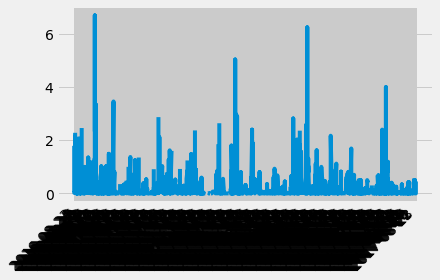

In [33]:
#Method 1
# plt.plot(year_precip.index, year_precip.prcp)
# plt.xticks(rotation=45, ha='right')

#Method 2
# create a figure and axes 
fig = plt.figure()

fig, ax = plt.subplots() 

# function to plot and show graph 
ax.plot(year_precip.index, year_precip.prcp) 

fig = ax.figure

fig.autofmt_xdate(rotation=45)

plt.show() 

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data = pd.read_sql('SELECT * FROM measurement', conn)
print('mean: ', precip_data.prcp.mean())
print('median: ', precip_data.prcp.median())
print('mode: ', precip_data.prcp.mode())
print('max: ', precip_data.prcp.max())
print(precip_data.prcp.min())

mean:  0.16064353974479206
median:  0.01
mode:  0    0.0
dtype: float64
max:  11.53
min:  0.0


In [99]:
# Design a query to show how many stations are available in this dataset?
list(pd.read_sql('SELECT distinct(station) FROM measurement', conn)['station'])

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
pd.read_sql('SELECT count(station) count, station FROM measurement GROUP BY station ORDER BY count DESC', conn)

,count,station
0,2772,USC00519281
1,2724,USC00519397
2,2709,USC00513117
3,2669,USC00519523
4,2612,USC00516128
5,2202,USC00514830
6,1979,USC00511918
7,1372,USC00517948
8,511,USC00518838


In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
query = '''
SELECT AVG(prcp), MIN(prcp), MAX(prcp)
FROM measurement
WHERE station = (
    SELECT station 
    FROM (
        SELECT COUNT(station) AS station_count , station
        FROM measurement
        GROUP BY station
	)
    WHERE station_count = (
        SELECT MAX(station_count)
        FROM (
            SELECT count(station) AS station_count
            FROM measurement 
            GROUP BY station 
	)))
'''
pd.read_sql(query, conn)

,AVG(prcp),MIN(prcp),MAX(prcp)
0,0.212352,0.0,9.64


In [55]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = '''
SELECT tobs
FROM measurement
WHERE station = (
    SELECT station 
    FROM (
        SELECT COUNT(station) AS station_count , station
        FROM measurement
        GROUP BY station
	)
    WHERE station_count = (
        SELECT MAX(station_count)
        FROM (
            SELECT count(station) AS station_count
            FROM measurement 
            GROUP BY station 
	))) AND date >= "2016-08-18"
'''
observations = pd.read_sql(query, conn)


(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 54., 32.,  9.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

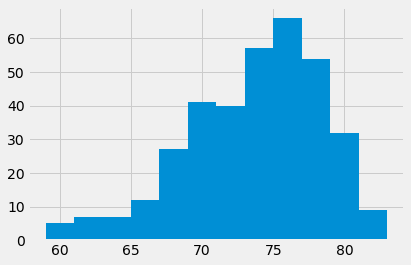

In [62]:
temp = observations.tobs.tolist()
plt.hist(x = temp, bins = 12)

## Part 3 - Data Analysis Assignment

In [94]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    tmax = pd.read_sql(f'SELECT max(tobs) mx FROM measurement WHERE date >= "{start_date}" and date <= "{end_date}"', conn).iloc[0][0]
    tmin = pd.read_sql(f'SELECT min(tobs) mi FROM measurement WHERE date >= "{start_date}" and date <= "{end_date}"', conn).iloc[0][0]
    tavg = pd.read_sql(f'SELECT avg(tobs) av FROM measurement WHERE date >= "{start_date}" and date <= "{end_date}"', conn).iloc[0][0]
    
    return {"max temp": tmax, "min temp": tmin, "avg temp": tavg}



# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

{'max temp': 74.0, 'min temp': 62.0, 'avg temp': 69.57142857142857}


In [95]:
results = pd.read_sql('SELECT date, prcp FROM measurement', conn)
dict(zip(results.date, results.prcp))

{'2010-01-01': 0.14,
 '2010-01-02': 0.0,
 '2010-01-03': 0.0,
 '2010-01-04': 0.0,
 '2010-01-06': 0.36,
 '2010-01-07': 0.3,
 '2010-01-08': 0.0,
 '2010-01-09': 0.0,
 '2010-01-10': 0.01,
 '2010-01-11': 0.14,
 '2010-01-12': 0.0,
 '2010-01-14': 0.0,
 '2010-01-15': 0.0,
 '2010-01-16': 0.0,
 '2010-01-17': 0.0,
 '2010-01-18': 0.0,
 '2010-01-19': 0.0,
 '2010-01-20': 0.0,
 '2010-01-21': 0.32,
 '2010-01-22': 0.0,
 '2010-01-23': 0.0,
 '2010-01-24': 0.01,
 '2010-01-25': 0.0,
 '2010-01-26': 0.03,
 '2010-01-27': 0.31,
 '2010-01-28': 0.07,
 '2010-01-30': 0.33,
 '2010-01-31': 1.1,
 '2010-02-01': 0.01,
 '2010-02-03': 0.67,
 '2010-02-04': 0.0,
 '2010-02-05': 0.09,
 '2010-02-06': 0.04,
 '2010-02-07': 0.0,
 '2010-02-08': 0.0,
 '2010-02-09': 0.0,
 '2010-02-11': 0.0,
 '2010-02-12': 0.65,
 '2010-02-13': 0.62,
 '2010-02-14': 0.02,
 '2010-02-15': 0.0,
 '2010-02-16': 0.0,
 '2010-02-17': 0.02,
 '2010-02-19': 0.42,
 '2010-02-20': 0.55,
 '2010-02-21': 0.0,
 '2010-02-22': nan,
 '2010-02-23': 0.0,
 '2010-02-24': 0.0,


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    
    # your code here
    
    return # your code here
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
